## Final figures

In [1]:
%matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("./actroot.mplstyle")
# Color map
import cmcrameri.cm as cmc
plt.register_cmap("managua_r", cmc.managua_r)
plt.rcParams["image.cmap"] = "managua_r"

import util as u
import histo2d as h2d
from importlib import reload

### Track reconstruction in merger

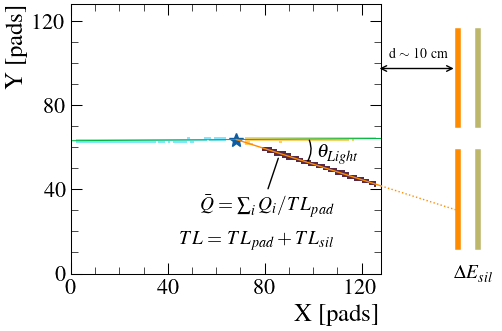

In [2]:
reload(u)
ev = u.DataInterface("../Events/fine_after.root")

fig = u.init_figure("event rec", figsize=(5.5, 3.5))
gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.8, 0.2])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
# for ax in [ax1]:
#     ax.set_box_aspect(1)

# Event
plt.sca(ax1)
ev.draw(True)
ev.draw_rp(markersize=10)
ev.draw_line(1, lw=0.75)

# Silicons
plt.sca(ax2)
ax2.set_ylim([0, 1])
ax2.set_xlim([0, 0.2])
ax2.grid(which="both")
# ax2.axhline(y=0.5, color="blue")
ax2.get_yaxis().set_visible(False)

def mirror(plot, x, y):
    ynew = [1 - e for e in y]
    plt.plot([x for _ in range(len(y))], ynew, color=plot.get_color(), ls=plot.get_linestyle(), lw=plot.get_linewidth())

#f0
x0 = 0.10
y0 = [0.1, 0.45]
f0, = plt.plot([x0, x0], y0, color="darkorange", lw=4)
mirror(f0, x0, y0)

#f1
x1 = 0.15
y1 = [0.1, 0.45]
f1, = plt.plot([x1, x1], y1, color="darkkhaki", lw=4)
mirror(f1, x1, y1)

#Line in active region
def transform(xmin, xmax):
    xd = np.linspace(xmin, xmax, 2)
    yd = [ev.eval_line(0, x) for x in xd]
    ac = np.array([(ax1.transData + ax1.transAxes.inverted()).transform([x, y]) for x,y in zip(xd, yd)])
    # print("ac: ", ac)
    fc = np.array([(ax1.transAxes + fig.transFigure.inverted()).transform([x, y]) for x,y in ac])
    # print("fc: ", fc)
    return fc
# Line in active region
lactive = transform(ev.rp[0], 128)
l0 = mpl.lines.Line2D(lactive[:,0], lactive[:,1], color ="darkorange", lw=1)
fig.add_artist(l0)
# Line in distance to silicons
ltosil = transform(128, 160)
l1 = mpl.lines.Line2D(ltosil[:,0], ltosil[:,1], color ="darkorange", lw=1, ls=":")
fig.add_artist(l1)

# Annotate charge average and TL
ax1.annotate(r"$\bar{Q} = \sum_{i}{Q_{i}} / TL_{pad}$\\ \\$TL = TL_{pad} + TL_{sil}$", xy=(86, 56), xytext=(45, 30), fontsize=14,
            arrowprops=dict(arrowstyle="-"))

# Distance to silicons
ax1.annotate("", xy=(0.685, 0.75), xytext=(0.83,0.75),
            xycoords="figure fraction", textcoords="figure fraction",
            arrowprops=dict(arrowstyle="<->"))
ax1.annotate(r"d $\sim$ 10 cm", xy=(0.76, 0.78), ha="center",
            xycoords="figure fraction", fontsize=10)
ax2.set_axis_off()

# Theta
ax1.annotate("", xy=(98, 64.5), xytext=(97, 52),
            arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.3"))
ax1.annotate(r"$\theta_{Light}$", xy=(102, 55), fontsize=14)

# DeltaE sil
ax1.annotate(r"$\Delta E_{sil}$", xy=(0.825, 0.15), xycoords="figure fraction", fontsize=14)

# DO NOT CALL THIS OTHERWISE THE POSITIONS WILL CHANGE
# plt.tight_layout()
plt.show()
plt.savefig("./Outputs/merger.pdf")

### 2D Histograms

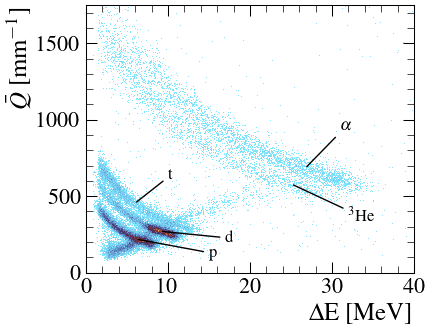

In [4]:
reload(h2d)
reload(u)

h = h2d.Histo2D("/media/Data/E796v2/Publications/pid/Inputs/pid_front.root", "hPID")
fig = plt.figure(2)
plt.close(fig)
fig = plt.figure(2, figsize=(4.5,3.5))

h.draw(r"$\Delta$E [MeV]", r"$\bar{Q}$ [mm$^{-1}$]")

plt.ylim(0, 1.75e3)
# plt.xlim(0, 20)

# Annotations
plt.annotate("p", xy=(6, 220), xytext=(15, 100), **u.ann_style)
plt.annotate("d", xy=(9, 270), xytext=(17, 200), **u.ann_style)
plt.annotate("t", xy=(5.9, 450), xytext=(10, 610), **u.ann_style)
plt.annotate(r"$^{3}$He", xy=(25, 580), xytext=(32, 340), **u.ann_style)
plt.annotate(r"$\alpha$", xy=(26.7, 680), xytext=(31, 926), **u.ann_style)


plt.tight_layout()
plt.show()
plt.savefig("./Outputs/pid_front.pdf", dpi=200)